## MLC HW 4

### Question 1 (40 points)

In this question, you will model traffic counts in Pittsburgh using Gaussian process (GP) regression.  The included dataset, "PittsburghTrafficCounts.csv", represents the average daily traffic counts computed by traffic sensors at over 1,100 locations in Allegheny County, PA.  The data was collected from years 2012-2014 and compiled by Carnegie Mellon University’s Traffic21 Institute; we have the longitude, latitude, and average daily count for each sensor.  

Given this dataset, your goal is to learn a model of traffic count as a function of spatial location.  To do so, fit a Gaussian Process regression model to the observed data.  While you can decide on the precise kernel specification, you should try to achieve a good model fit, as quantified by a log marginal likelihood value greater than (i.e., less negative than) -1400.  Here are some hints for getting a good model fit:

* We recommend that you take the logarithm of the traffic counts, and then subtract the mean of this vector, before fitting the model.

* Since the data is noisy, don't forget to include a noise term (WhiteKernel) in your model.

* When fitting a GP with RBF kernel on multidimensional data, you can learn a separate length scale for each dimension, e.g., length_scale=(length_scale_x, length_scale_y). 

Your Python code should provide the following five outputs:

1) The kernel after parameter optimization and fitting to the observed data. (10 pts)

2) The log marginal likelihood of the training data. (5 pts)

3) Show a 2-D plot of the model's predictions over a mesh grid of longitude/latitude (with color corresponding to the model's predictions) and overlay a 2-D scatter plot of sensor locations (with color corresponding to the observed values). (10 pts)

4) What percentage of sensors have average traffic counts more than two standard deviations higher or lower than the model predicts given their spatial location? (5 pts)

5) Show a 2-D scatter plot of the sensor locations, with three colors corresponding to observed values a) more than two standard deviations higher than predicted, b) more then two standard deviations lower than predicted, and c) within two standard deviations of the predicted values. (10 pts)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
Data1=pd.read_csv("PittsburghTrafficCounts.csv")
Data1.head()

,Longitude,Latitude,AvgDailyTrafficCount
0,-80.278366,40.468606,84.0
1,-80.162117,40.384598,95.0
2,-80.221205,40.366778,97.0
3,-80.142455,40.622084,111.0
4,-80.131975,40.544915,125.0


Kernel: RBF(length_scale=[0.0404, 0.0552]) + WhiteKernel(noise_level=0.58)
Log Marginal Likelihood: -1371.6989875674233


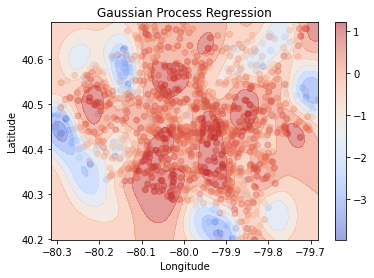

Percentage of sensors more than two standard deviations higher: 0.4484304932735426
Percentage of sensors more than two standard deviations lower: 4.753363228699552


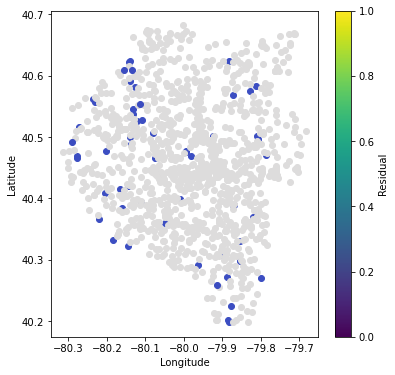

In [4]:
X = Data1[['Longitude', 'Latitude']].values
y = np.log(Data1['AvgDailyTrafficCount'].values)
y = y - np.mean(y)

kernel = RBF(length_scale=(1.0, 1.0)) + WhiteKernel(noise_level=1.0)

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gp.fit(X, y)

print('Kernel:', gp.kernel_)
print('Log Marginal Likelihood:', gp.log_marginal_likelihood_value_)

lon_min, lon_max = X[:, 0].min(), X[:, 0].max()
lat_min, lat_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))
X_mesh = np.vstack([xx.ravel(), yy.ravel()]).T

y_mesh = gp.predict(X_mesh)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.contourf(xx, yy, y_mesh.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gaussian Process Regression')
plt.show()

residuals = y - gp.predict(X)

residual_std = np.std(residuals)
upper = np.sum(residuals > 2*residual_std) / len(residuals) * 100
lower = np.sum(residuals < -2*residual_std) / len(residuals) * 100
print('Percentage of sensors more than two standard deviations higher:', upper)
print('Percentage of sensors more than two standard deviations lower:', lower)

cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(6, 6))
for i in range(X.shape[0]):
    if residuals[i] > 2 * residual_std:
        plt.scatter(X[i, 0], X[i, 1], color=cmap(0))
    elif residuals[i] < -2 * residual_std:
        plt.scatter(X[i, 0], X[i, 1], color=cmap(1))
    else:
        plt.scatter(X[i, 0], X[i, 1], color=cmap(0.5))

plt.colorbar(label='Residual')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Question 2: Cluster-based anomaly detection (10 points)

Given an unlabeled dataset with two real-valued attributes, we perform cluster-based anomaly detection by running k-means, choosing the number of clusters k automatically using the Schwarz criterion.  Four clusters are formed:

A: 100 points, center (0, 0), standard deviation 1

B: 150 points, center (35, 5), standard deviation 5

C: 200 points, center (15, 20), standard deviation 0.1

D: 2 points, center (10, 10), standard deviation 1

Given the four points below, which of these points are, and are not, likely to be anomalies?  Choose “Anomaly” or “Not Anomaly”, and provide a brief explanation, for each point. 
(Hint: your answers should take into account the size and standard deviation of each cluster as well as the distances to cluster centers.)

(1, 0)		Anomaly / Not Anomaly   
Anomaly

(35, 2)		Anomaly / Not Anomaly
Anomaly

(15, 19)	Anomaly / Not Anomaly
Anomaly

(10, 11)	Anomaly / Not Anomaly
Anomaly

### Your solutions here

According to normal distribution, we can use the 3-sigma rule to calculate the threshold for each cluster. 
Thresholds for each cluster:
A: 3 * 1 = 3
B: 3 * 5 = 15
C: 3 * 0.1 = 0.3
D: 3 * 1 = 3

For (1, 0):
Distance to A: 1.00
Distance to B: 34.37
Distance to C: 24.41
Distance to D: 13.45
The distance to cluster A is less than the threshold of 3, but the distances to clusters B, C, and D are greater than their respective thresholds. Therefore, point (1, 0) is an anomaly.

For (35, 2):
Distance to A: 35.06
Distance to B: 3.00
Distance to C: 26.91
Distance to D: 26.25
The distance to cluster B is less than the threshold of 15, but the distances to clusters A, C, and D are greater than their respective thresholds. Therefore, point (35, 2) is an anomaly.

(15, 19):
Distance to A: 24.21
Distance to B: 24.41
Distance to C: 1.00
Distance to D: 10.30
The distances to clusters A, B, C and D are all greater than their respective thresholds. Therefore, point (15, 19) is an anomaly.

(10, 11):
Distance to A: 14.87
Distance to B: 25.71
Distance to C: 10.30
Distance to D: 1.00
The distance to cluster D is less than the threshold of 3, but the distances to clusters A, B, and C are greater than their respective thresholds. Therefore, point (10, 11) is an anomaly.

### Question 3: Anomaly detection (50 points)

For this question, use the "County Health Indicators" dataset provided to identify the most anomalous counties. Please list the top 5 most anomalous counties computed using each of the following models.  (We recommend that, as a pre-processing step, you drop na values, and make sure all numeric values are treated as floats not strings.)

Part 1: Learn a Bayesian network structure using only the six features ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"].  Use pd.cut() to discretize each feature into 5 categories: 0,1,2,3,4. 

(a) Use HillClimbSearch and BicScore to learn the Bayesian network structure (5 pts) 

(b) Which 5 counties have the lowest (most negative) log-likelihood values? Please show a ranked list of the top counties' names and log-likelihood values. (10 pts)

Part 2: Cluster based anomaly detection.  Use all numeric features for this part, and do not discretize. 

(a) Clustering with k-means. Please use k=3 clusters. Compute each record's distance to the nearest cluster center and report the five counties which have the longest distances. (10 pts)

(b) Cluster with Gaussian Mixture. Please repeat (2)a but use log-likelihood for each record (rather than distance) as the measure of anomalousness. (10 pts)

Part 3: Choose one more anomaly detection model you prefer and report the top 5 most anomalous counties by the model you chose.  (10 pts)

Part 4: Compare and contrast the results from the different models.  Were there some counties that were found to be anomalous in some models and not in others?  Please provide some intuitions on why each county was found to be anomalous. (5 pts)

In [1]:
#Part1
import pandas as pd
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import numpy as np
from pgmpy.metrics import log_likelihood_score
from pgmpy.models import BayesianNetwork


df = pd.read_csv('2016CountyHealthIndicators.csv')


features = ["'\% Smokers'","'\% Obese'","'Violent Crime Rate'","'80/20 Income Ratio'","'\% Children in Poverty'","'Average Daily PM2.5'"]
df = df[~df.isin(["?"]).any(axis=1)]
data = df[features].astype(float)

df_discretized = pd.DataFrame()
for column in data.columns:
    df_discretized[column] = pd.cut(data[column], bins=5, labels=[0,1,2,3,4], include_lowest=True)

data = df_discretized
hc = HillClimbSearch(data, state_names={"scoring_method" : "bicscore"})
best_model = hc.estimate()
print(best_model.edges())

model = BayesianNetwork(best_model.edges())
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Compute the log-likelihood of each data point
infer = VariableElimination(model)
log_likelihoods = []
for i, row in data.iterrows():
    value = pd.DataFrame(np.array(row.values.tolist()).reshape(1,6), columns=features)
    log_likelihoods.append(log_likelihood_score(model, value))

# Add the log-likelihoods as a new column to the original DataFrame
df["log_likelihood"] = log_likelihoods

# Sort the DataFrame by log-likelihood to get the most anomalous counties
anomalous_counties = df[['County', 'log_likelihood']].sort_values('log_likelihood', ascending=True).head(5)
print(anomalous_counties)    


[("'\\% Smokers'", "'\\% Obese'"), ("'\\% Smokers'", "'\\% Children in Poverty'"), ("'\\% Smokers'", "'Average Daily PM2.5'"), ("'\\% Obese'", "'\\% Children in Poverty'"), ("'\\% Children in Poverty'", "'80/20 Income Ratio'"), ("'\\% Children in Poverty'", "'Violent Crime Rate'"), ("'\\% Children in Poverty'", "'Average Daily PM2.5'")]
                         County  log_likelihood
1856         New York, New York      -15.586186
1227     Suffolk, Massachusetts      -14.668065
221   San Francisco, California      -14.642102
248           Boulder, Colorado      -13.995368
2027     Roulette, North Dakota      -13.993595


In [2]:
# your code here
#Part2 (a)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
df = pd.read_csv('2016CountyHealthIndicators.csv')
df = df[~df.isin(["?"]).any(axis=1)]
features = df.columns.tolist()[1:]
data = df[features].astype(float)
scaler = StandardScaler()
data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
distances = []
for i in range(len(df)):
    distances.append(distance.euclidean(kmeans.cluster_centers_[kmeans.labels_[i]], data[i]))
df['kmeans_distance'] = distances
print(df.sort_values('kmeans_distance', ascending=False).head(5)['County'].tolist())


['Shannon, South Dakota', 'New York, New York', 'Apache, Arizona', 'Bronx, New York', 'Kings, New York']


In [3]:
#Part2 (b)

from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=3, random_state=0).fit(data)
log_likelihoods = gmm_model.score_samples(data)
df['gmm_log_likelihood'] = log_likelihoods
print(df.sort_values('gmm_log_likelihood', ascending=True).head(5)['County'].tolist())

['Shannon, South Dakota', 'New York, New York', 'Apache, Arizona', 'Imperial, California', 'Roulette, North Dakota']


In [4]:
#Part 3

from sklearn.ensemble import IsolationForest

iforest_model = IsolationForest(random_state=42).fit(data)
anomaly_scores = iforest_model.score_samples(data)
df['iforest_anomaly_score'] = anomaly_scores
print(df.sort_values('iforest_anomaly_score', ascending=True).head(5)['County'].tolist())

['Shannon, South Dakota', 'East Carroll, Louisiana', 'Apache, Arizona', 'Roulette, North Dakota', 'Coahoma, Mississippi']


Looking at the results from the three different models, we can see that Shannon, South Dakota and Apache, Arizona are consistently identified as anomalous counties across all models and others are not. The different models seem to be identifying different types of anomalous counties based on the specific features and assumptions of each model. Understanding the strengths and limitations of each model is important in selecting an appropriate approach for anomaly detection in different contexts.